# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib
import warnings 
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_abalone=pd.read_csv('abalone.csv')
df_abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# EXPLORATORY DATA ANALYSIS

In [3]:
df_abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df_abalone.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
df_abalone.shape

(4177, 9)

In [6]:
df_abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked Weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
df_abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked Weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked Weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Data in all the columns appear to have normal distribution (mean very close to 50th percentile).

In [10]:
#sns.heatmap(df_abalone.isnull(),annot=True)

In [11]:
df_abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked Weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

LABEL ENCODING

In [12]:
le=LabelEncoder()
list=['Sex']
for val in list:
    df_abalone[val]=le.fit_transform(df_abalone[val].astype(str))
df_abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


CHECKING DATA SKEWNESS

In [13]:
df_abalone.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked Weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

REMOVING DATA SKEWNESS

In [14]:
for col in df_abalone.columns:
    if df_abalone.skew().loc[col]>0.55:
        df_abalone[col]=np.log1p(df_abalone[col])
df_abalone.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            1.099602
Whole weight      0.530959
Shucked Weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
Rings            -0.061317
dtype: float64

CHECKING OUTLIERS

In [15]:
z=np.abs(zscore(df_abalone))
print(z.shape)
print(np.where(z>3))

(4177, 9)
(array([ 129,  163,  164,  165,  165,  166,  168,  236,  236,  236,  236,
        237,  237,  237,  238,  238,  238,  239,  294,  306,  358,  480,
        520,  526,  526,  526,  694,  694,  696,  696,  719,  719,  719,
        720,  720,  720,  891,  891,  894, 1051, 1052, 1054, 1174, 1204,
       1207, 1207, 1209, 1209, 1257, 1417, 1422, 1427, 1427, 1428, 1429,
       1429, 1429, 1528, 1762, 1762, 1763, 1763, 1763, 1986, 1987, 1987,
       2051, 2108, 2108, 2114, 2114, 2115, 2157, 2161, 2169, 2201, 2209,
       2334, 2334, 2371, 2381, 2623, 2624, 2711, 2811, 2811, 2862, 2863,
       3007, 3008, 3149, 3151, 3280, 3427, 3427, 3472, 3521, 3599, 3599,
       3713, 3715, 3715, 3715, 3800, 3801, 3837, 3899, 3899, 3902, 3902,
       3996], dtype=int64), array([7, 7, 7, 4, 7, 7, 7, 1, 2, 3, 8, 1, 2, 8, 1, 2, 8, 1, 8, 8, 4, 8,
       8, 1, 2, 8, 2, 3, 1, 2, 1, 2, 8, 1, 2, 8, 4, 7, 8, 4, 4, 8, 3, 6,
       4, 5, 4, 5, 3, 3, 6, 4, 5, 7, 1, 2, 8, 5, 4, 6, 4, 5, 6, 1, 1, 2,
       3, 7,

REMOVING OUTLIERS

In [16]:
df_final=df_abalone.loc[(z<3).all(axis=1)]
print(df_final.shape)

(4102, 9)


BOXPLOT

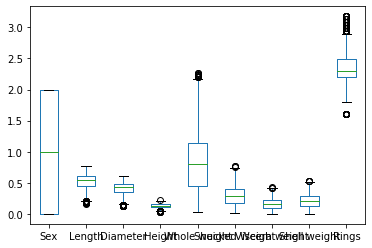

In [17]:
df_final.plot.box()

CATPLOT

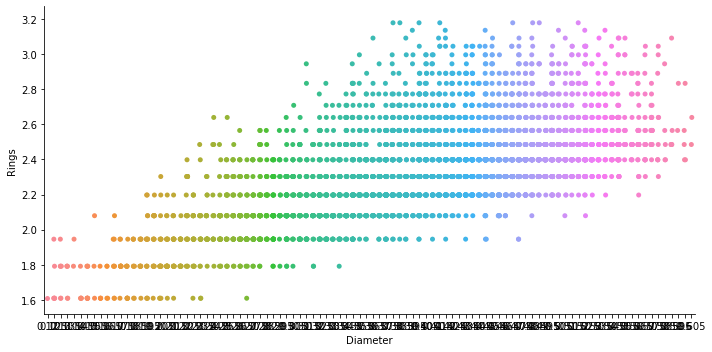

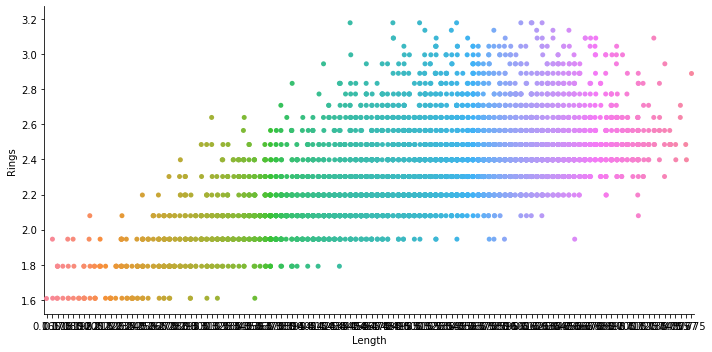

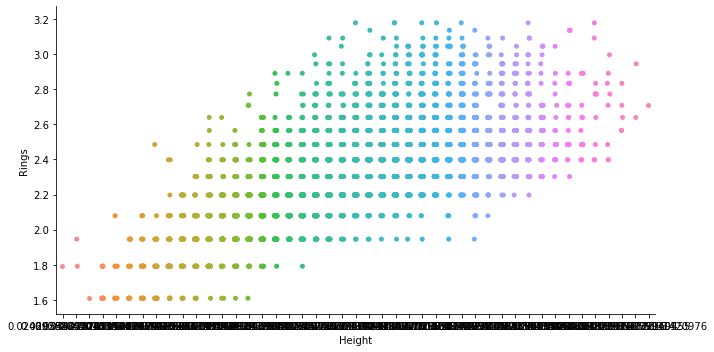

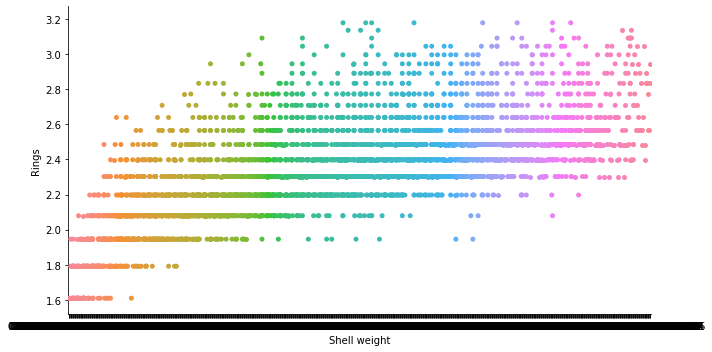

In [18]:
plot=df_final
catplot=sns.catplot(x="Diameter", y="Rings", aspect=2,data=plot)
catplot=sns.catplot(x="Length", y="Rings", aspect=2,data=plot)
catplot=sns.catplot(x="Height", y="Rings", aspect=2,data=plot)
catplot=sns.catplot(x="Shell weight", y="Rings", aspect=2,data=plot)

CORRELATION

In [19]:
df_final.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.039618,-0.042147,-0.044407,-0.028903,-0.013921,-0.040289,-0.038192,-0.030802
Length,-0.039618,1.000000,0.985721,0.899377,0.933430,0.931110,0.921788,0.926399,0.620647
Diameter,-0.042147,0.985721,1.000000,0.905764,0.932526,0.925364,0.917511,0.933514,0.637832
Height,-0.044407,0.899377,0.905764,1.000000,0.891555,0.860573,0.880470,0.909919,0.661600
Whole weight,-0.028903,0.933430,0.932526,0.891555,1.000000,0.971295,0.968058,0.959746,0.583294
Shucked Weight,-0.013921,0.931110,0.925364,0.860573,0.971295,1.000000,0.938165,0.904140,0.501674
Viscera weight,-0.040289,0.921788,0.917511,0.880470,0.968058,0.938165,1.000000,0.923226,0.568636
Shell weight,-0.038192,0.926399,0.933514,0.909919,0.959746,0.904140,0.923226,1.000000,0.670771
Rings,-0.030802,0.620647,0.637832,0.661600,0.583294,0.501674,0.568636,0.670771,1.000000


PAIRPLOT

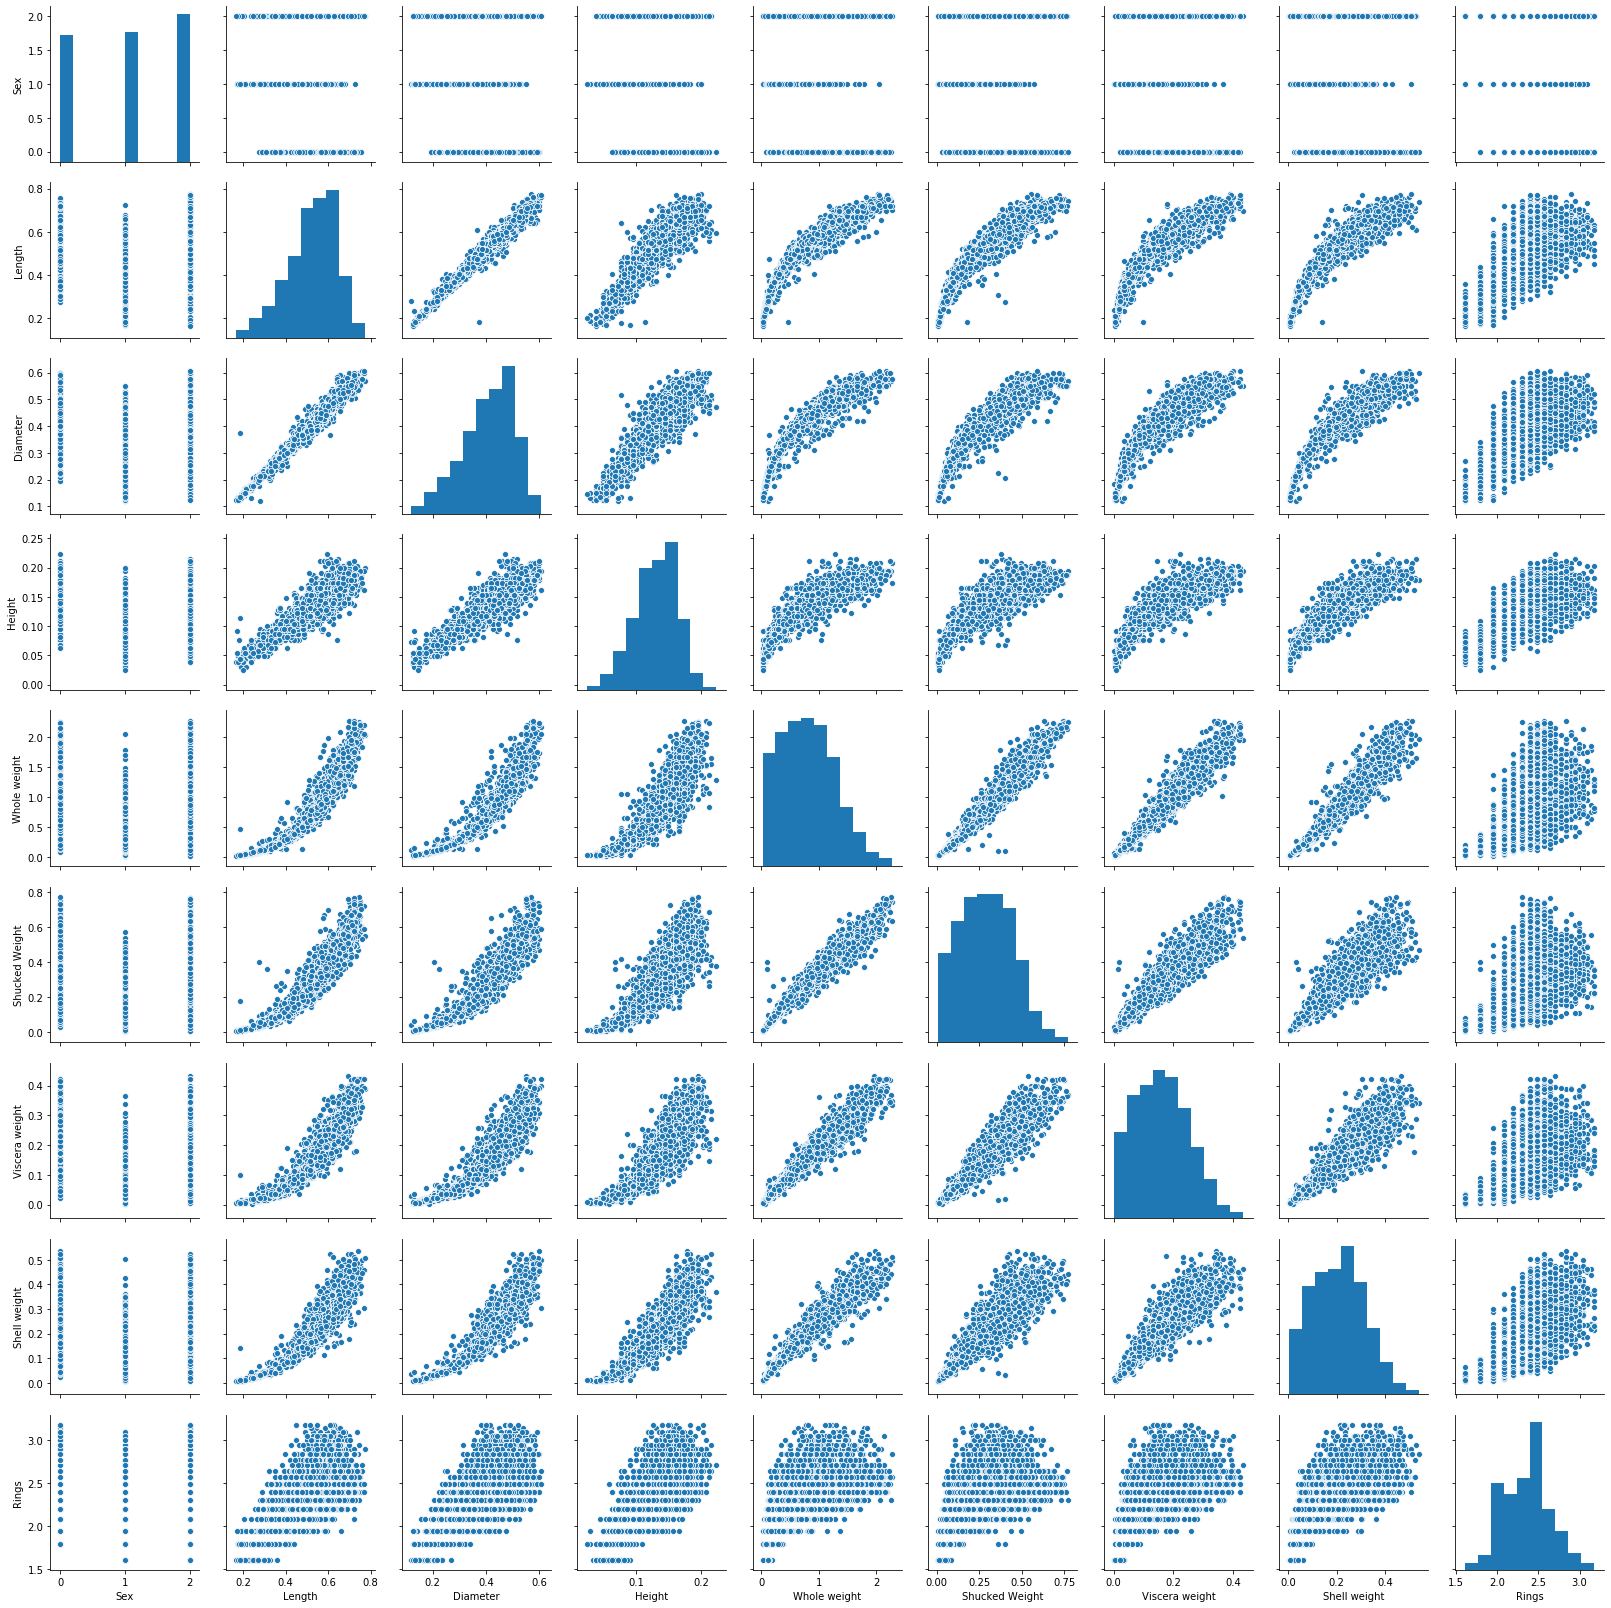

In [20]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [21]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

      Sex  Length  Diameter    Height  Whole weight  Shucked Weight  \
0       2   0.455     0.365  0.090754        0.5140        0.202533   
1       2   0.350     0.265  0.086178        0.2255        0.094856   
2       0   0.530     0.420  0.126633        0.6770        0.228330   
3       2   0.440     0.365  0.117783        0.5160        0.195156   
4       1   0.330     0.255  0.076961        0.2050        0.085719   
...   ...     ...       ...       ...           ...             ...   
4172    0   0.565     0.450  0.152721        0.8870        0.314811   
4173    2   0.590     0.440  0.126633        0.9660        0.363948   
4174    2   0.600     0.475  0.186480        1.1760        0.422322   
4175    0   0.625     0.485  0.139762        1.0945        0.425921   
4176    2   0.710     0.555  0.178146        1.9485        0.665519   

      Viscera weight  Shell weight  
0           0.096219      0.139762  
1           0.047361      0.067659  
2           0.132343      0.190620  

In [22]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

FUNCTION DECLARATION

In [23]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("R2 Score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("Maximum R2 Score corresponds to ",final_r_state," is ",max_r_score)
    return(final_r_state)

LINEAR REGRESSION

In [24]:
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

R2 Score corresponding to  42  is  0.5753893703439463
R2 Score corresponding to  43  is  0.5715657370025016
R2 Score corresponding to  44  is  0.5876293289821172
R2 Score corresponding to  45  is  0.5583605474111007
R2 Score corresponding to  46  is  0.5995872555527266
R2 Score corresponding to  47  is  0.535260334755824
R2 Score corresponding to  48  is  0.5733765555365399
R2 Score corresponding to  49  is  0.6001212554667206
R2 Score corresponding to  50  is  0.5939290105237476
R2 Score corresponding to  51  is  0.5429908920569322
R2 Score corresponding to  52  is  0.5775729683762307
R2 Score corresponding to  53  is  0.5802365106172082
R2 Score corresponding to  54  is  0.587510346250233
R2 Score corresponding to  55  is  0.5828553763625761
R2 Score corresponding to  56  is  0.5670054092155061
R2 Score corresponding to  57  is  0.5927135546405793
R2 Score corresponding to  58  is  0.5837197571078845
R2 Score corresponding to  59  is  0.5583074048059511
R2 Score corresponding to  60 

In [25]:
print("Mean R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean())
print("Standard Deviation in R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').std())

Mean R2 Score for Linear Regression is  0.4827843229952068
Standard Deviation in R2 Score for Linear Regression is  0.07633839011960554


KNEIGHBORS REGRESSOR

In [26]:
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=5)
gknr.fit(df_x,y)
gknr.best_params_

{'n_neighbors': 12}

In [27]:
knr=KNeighborsRegressor(n_neighbors=12)
r_state=maxr2_score(knr,x,y)

R2 Score corresponding to  42  is  0.6142426287068503
R2 Score corresponding to  43  is  0.6006598793518639
R2 Score corresponding to  44  is  0.6093775120598048
R2 Score corresponding to  45  is  0.5744706193814371
R2 Score corresponding to  46  is  0.6321379193073042
R2 Score corresponding to  47  is  0.5800153277763707
R2 Score corresponding to  48  is  0.5873501333357707
R2 Score corresponding to  49  is  0.5943774627036187
R2 Score corresponding to  50  is  0.604469905353573
R2 Score corresponding to  51  is  0.5681642860961889
R2 Score corresponding to  52  is  0.6028382309305782
R2 Score corresponding to  53  is  0.5914608090374002
R2 Score corresponding to  54  is  0.6166803760757544
R2 Score corresponding to  55  is  0.5908728369727466
R2 Score corresponding to  56  is  0.6189660447501037
R2 Score corresponding to  57  is  0.6022642748224433
R2 Score corresponding to  58  is  0.5950064765821697
R2 Score corresponding to  59  is  0.6012460050058692
R2 Score corresponding to  60

In [28]:
print("Mean R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for KNN Regression is  0.530891118703871
Standard Deviation in R2 Score for KNN Regression is  0.06709887129069343


LASSO REGRESSION

In [29]:
ls=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [30]:
ls=Lasso(alpha=0.001)
r_state=maxr2_score(ls,x,y)

R2 Score corresponding to  42  is  0.5330332881048911
R2 Score corresponding to  43  is  0.5317970831443766
R2 Score corresponding to  44  is  0.5472372525040048
R2 Score corresponding to  45  is  0.5067435487334726
R2 Score corresponding to  46  is  0.5466989815868893
R2 Score corresponding to  47  is  0.4870558844346089
R2 Score corresponding to  48  is  0.5413775342018698
R2 Score corresponding to  49  is  0.5586458375702381
R2 Score corresponding to  50  is  0.5384777143018553
R2 Score corresponding to  51  is  0.4920928312727679
R2 Score corresponding to  52  is  0.5255749537023262
R2 Score corresponding to  53  is  0.531435976522665
R2 Score corresponding to  54  is  0.546805565937099
R2 Score corresponding to  55  is  0.5354488464658107
R2 Score corresponding to  56  is  0.5230307657896767
R2 Score corresponding to  57  is  0.523306454857148
R2 Score corresponding to  58  is  0.548913838967414
R2 Score corresponding to  59  is  0.5298018027333629
R2 Score corresponding to  60  i

In [31]:
print("Mean R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Lasso Regression is  0.4267759310833938
Standard Deviation in R2 Score for Lasso Regression is  0.09501146802722285


RIDGE REGRESSION

In [32]:
rd=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [33]:
rd=Ridge(alpha=0.001)
r_state=maxr2_score(rd,x,y)

R2 Score corresponding to  42  is  0.575397956946863
R2 Score corresponding to  43  is  0.571573665315491
R2 Score corresponding to  44  is  0.587637710608981
R2 Score corresponding to  45  is  0.5583658883093712
R2 Score corresponding to  46  is  0.5995837052389748
R2 Score corresponding to  47  is  0.5352605805995945
R2 Score corresponding to  48  is  0.5733979344816165
R2 Score corresponding to  49  is  0.6001265379043202
R2 Score corresponding to  50  is  0.5939284947465833
R2 Score corresponding to  51  is  0.5429897952837911
R2 Score corresponding to  52  is  0.5775642430573862
R2 Score corresponding to  53  is  0.5802285073521056
R2 Score corresponding to  54  is  0.5875018899633855
R2 Score corresponding to  55  is  0.5828764118717673
R2 Score corresponding to  56  is  0.5670034622269007
R2 Score corresponding to  57  is  0.5926890210548991
R2 Score corresponding to  58  is  0.5837401990946804
R2 Score corresponding to  59  is  0.5583445259499509
R2 Score corresponding to  60  

In [34]:
print("Mean R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Ridge Regression is  0.48278412022341677
Standard Deviation in R2 Score for Ridge Regression is  0.07633139405680664


ELASTIC NET REGRESSION

In [35]:
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [36]:
enr=ElasticNet(alpha=0.001)
r_state=maxr2_score(enr,x,y)

R2 Score corresponding to  42  is  0.5401006386766556
R2 Score corresponding to  43  is  0.5353835511532467
R2 Score corresponding to  44  is  0.5521767700423106
R2 Score corresponding to  45  is  0.5142626988483805
R2 Score corresponding to  46  is  0.5536218755036615
R2 Score corresponding to  47  is  0.4964981616114189
R2 Score corresponding to  48  is  0.5456072335492296
R2 Score corresponding to  49  is  0.5630254314189319
R2 Score corresponding to  50  is  0.5432548790927184
R2 Score corresponding to  51  is  0.5026788641617292
R2 Score corresponding to  52  is  0.5294491449572867
R2 Score corresponding to  53  is  0.5366339593791153
R2 Score corresponding to  54  is  0.5504587755700383
R2 Score corresponding to  55  is  0.5428677700657674
R2 Score corresponding to  56  is  0.5268045000153101
R2 Score corresponding to  57  is  0.5333117598005634
R2 Score corresponding to  58  is  0.555006562288
R2 Score corresponding to  59  is  0.5360544523573934
R2 Score corresponding to  60  i

In [37]:
print("Mean R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Elastic Net Regression is  0.4334030423299565
Standard Deviation in R2 Score for Elastic Net Regression is  0.09369307945299112


GRADIENT BOOSTING REGRESSOR

In [38]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [39]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
r_state=maxr2_score(gbr,x,y)

R2 Score corresponding to  42  is  0.6300390624066883
R2 Score corresponding to  43  is  0.6203180966947752
R2 Score corresponding to  44  is  0.6158780323519699
R2 Score corresponding to  45  is  0.607807444485417
R2 Score corresponding to  46  is  0.6489142866571574
R2 Score corresponding to  47  is  0.5939936117673112
R2 Score corresponding to  48  is  0.6034192795363591
R2 Score corresponding to  49  is  0.6248891758500454
R2 Score corresponding to  50  is  0.624331306425767
R2 Score corresponding to  51  is  0.5904073989954735
R2 Score corresponding to  52  is  0.6149869759182187
R2 Score corresponding to  53  is  0.6257578599219279
R2 Score corresponding to  54  is  0.6353296924589064
R2 Score corresponding to  55  is  0.6052873829311263
R2 Score corresponding to  56  is  0.6416718227139155
R2 Score corresponding to  57  is  0.6174363702081369
R2 Score corresponding to  58  is  0.6254392494190819
R2 Score corresponding to  59  is  0.6161321998776252
R2 Score corresponding to  60 

In [40]:
print("Mean R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Gradient Boosting Regressor is  0.5503445146034303
Standard Deviation in R2 Score for Gradient Boosting Regressor is  0.06381499202930466


# BEST MODEL

R2 SCORE AND RMSE

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("R2 Score is ",r2_score(y_test,y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score is  0.6545025651034713
RMSE is  0.16616103559511458


CROSS VALIDATION

In [42]:
score=cross_val_score(gbr,x,y,cv=5)
print('Score is ',score)
print('Mean Score is ', score.mean())
print('Standard Deviation is ',score.std())

Score is  [0.49872786 0.45392843 0.58126174 0.62423864 0.59331282]
Mean Score is  0.5502938982522969
Standard Deviation is  0.06359688416406391


# PICKLE

In [43]:
joblib.dump(gbr,'abalone.pkl')

['abalone.pkl']